### __Financial Instrument Class__

OOP와 Class 생성은 실제 세계의 문제를 풀도록 도와주는 아주 실용적인 것
실습을 통해서 배우는 것이 배우고 마스터하는 최고의 방법
클래스 생성을 통해서 상속이나 다형성 같은 개념도 이해하게 될 것

##### OOP - not the complex!
- Everythin is an Object in Python
- You have already used and worked with Object/Classes:
  - <span style="color:violet">String</span> ("Dog")
    - class(type):String
    - One Example (Instance): "Dog" <- 가능한 인스턴스의 예는 무제한
    - The String Class is like an abstract template that we can use to work with any text data.
  - <span style="color:violet">Lists</span> ([1,2,3])
  - <span style="color:violet">Pandas DataFrames</span> (titanic dataset)
    - 테이블형 데이터를 다룰 수 있게 해줌
    - 모든 테이블형 데이터를 만들고 추적할 수 있는 추상적 템플릿
- Python allows you to create your <span style="color:violet">own Classes</span> to <span style="color:violet">solve Problems</span> and perform customized tasks and workflows with <span style="color:violet">efficent</span> and <span style="color:violet">reusable</span> code.
  - Class to <span style="color:violet">analyze Financial Instruments</span> (e.g. stocks)

OOP는 자연스럽고 인간에 가까운 사고방식이라고 할 수 있음(the human way of thinking)
- 인간의 사고는 일반적으로 실제 세계의 사물을 위주로 함
  - 예시: 두 부분으로 구성된 비누방울 장난감
    - 비누방울 장난감의 특징이나 속성
    - 객체로서 비누방울의 크기나 색상
- How to learn and master OOP:
  - With simple and intuitive real-world examples
  - start with the final Solution
  - step by step

### An example Class: pandas.DataFrame
Goal: handling and manipulating any Tabular Data (efficiently)
- 클래스가 사용하기 쉽고 직관적이며 간결하고 구문이 짧아야 함
- pandas.DataFrame 클래스가 완벽한 예

In [1]:
import pandas as pd

Instantiation (인스턴스화)
- 클래스 pandas.DataFrame의 구체적인 객체를 생성한다는 의미

In [5]:
# 데이터프레임의 특정한 객체 or 인스턴스를 변수 df에 저장 후 df 출력
df = pd.read_csv("Appendix/Video_Lecture_NBs/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [7]:
#df의 type 출력 : 객체의 데이터형이나 클래스 확인 가능
type(df)

pandas.core.frame.DataFrame

Attributes

In [8]:
# 테이블의 형상 출력
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck'],
      dtype='object')

In [10]:
df.shape
# 첫 번째 요소는 행의 개수, 두 번째 요소는 열의 개수

(891, 9)

Methods
- 인스턴스화한 객체에 대한 연산을 수행할 수 있음

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [13]:
# 특정한 열별로 데이터프레임을 정렬
# 예시에서는 age 기준, 내림차순 정렬
df.sort_values(by = "age", ascending= False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
630,1,1,male,80.0,0,0,30.0000,S,A
851,0,3,male,74.0,0,0,7.7750,S,NaN
493,0,1,male,71.0,0,0,49.5042,C,NaN
96,0,1,male,71.0,0,0,34.6542,C,A
116,0,3,male,70.5,0,0,7.7500,Q,NaN
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,NaN
863,0,3,female,NaN,8,2,69.5500,S,NaN
868,0,3,male,NaN,0,0,9.5000,S,NaN
878,0,3,male,NaN,0,0,7.8958,S,NaN


yfinance 패키지가 필요
- ```pip install yfinance ```

### __The FinancialInstrument Class live in action (Part 1)__
Goal : Analyzing Financial Instruments (e.g. stocks) efficintly

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

In [28]:
class FinancialInstrument():
    ''' Class for analyzing Financial Instruments like stocks. 
    Attributes
    ==========
    ticker: str
        ticker sybol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns (risk)
    annualized_perf:
        calculates annulized return and risk
    '''

    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self):
        return "FinancialInstrument(ticker={}, start={}, end={})".format(self.ticker, self.start, self.end)
    
    def get_data(self):
        ''' retrieves (from yahoo finance) and prepares the data
        '''
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace= True)
        self.data = raw
    
    def log_returns(self):
        '''calculates log returns
        '''
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

    def plot_prices(self):
        ''' creates a price chart
        '''
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize=15)

    def plot_returns(self, kind = "ts"):
        '''plots log returns either as time series ("ts") or histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self.ticker), fontsize=15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        '''sets a new ticker
        '''
        if ticker is not None:
            self.ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        '''calculates mean return
        '''
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        '''calculates the standard deviation of returns (risk)
        '''
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''calculates annulized return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))


__Instantiation__

In [29]:
stock = FinancialInstrument(ticker="AAPL", start= "2015-01-01", end="2019-12-31") 
stock

[*********************100%***********************]  1 of 1 completed


FinancialInstrument(ticker=AAPL, start=2015-01-01, end=2019-12-31)

In [30]:
type(stock)

__main__.FinancialInstrument

__Attributes__

In [31]:
stock.ticker

'AAPL'

In [32]:
stock.start

'2015-01-01'

In [33]:
stock.end

'2019-12-31'

In [34]:
stock.data

,price,log_returns
Date,,
2015-01-02 00:00:00-05:00,27.332500,NaN
2015-01-05 00:00:00-05:00,26.562500,-0.028576
2015-01-06 00:00:00-05:00,26.565001,0.000094
2015-01-07 00:00:00-05:00,26.937500,0.013925
2015-01-08 00:00:00-05:00,27.972500,0.037703
...,...,...
2019-12-23 00:00:00-05:00,71.000000,0.016187
2019-12-24 00:00:00-05:00,71.067497,0.000950
2019-12-26 00:00:00-05:00,72.477501,0.019646


__Methods__

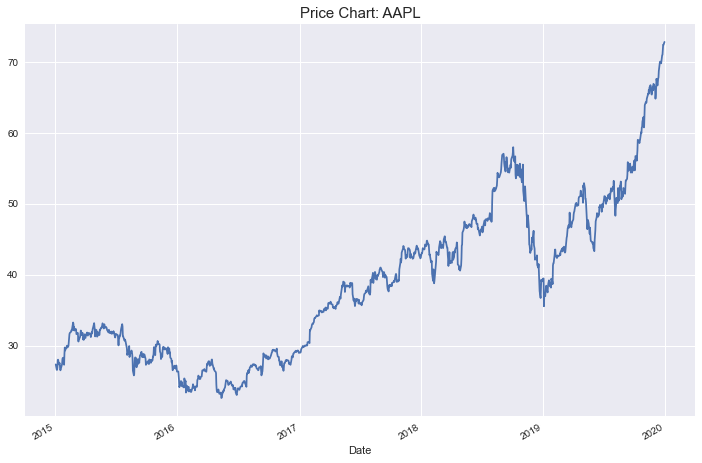

In [35]:
stock.plot_prices()

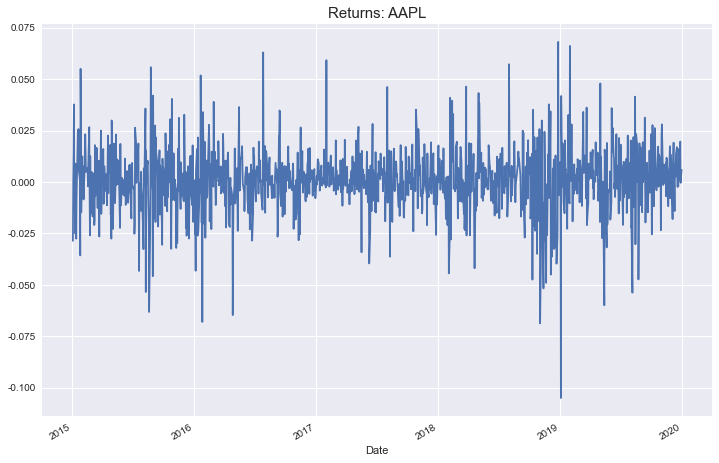

In [36]:
stock.plot_returns()

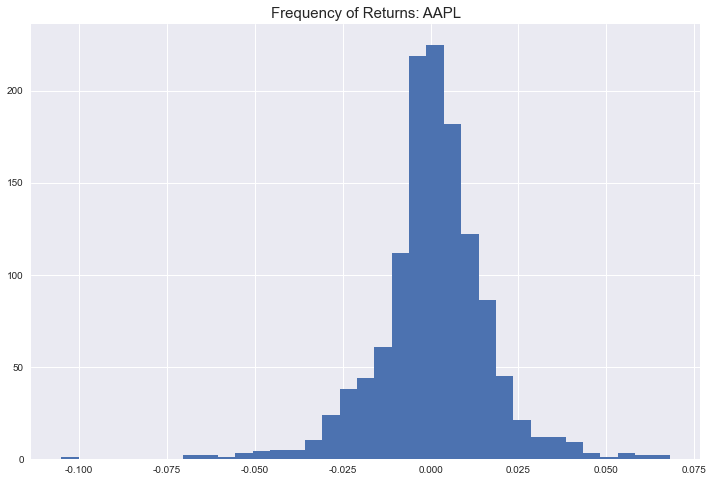

In [38]:
# 수익률의 빈도를 보기 위한 히스토그램
stock.plot_returns(kind="hist")

### __The FinanceInstrument Class live in action (Part 2)
more Methods

In [40]:
# 평균 수익률
stock.mean_return()

0.0007808421402793629

In [46]:
# 같은 내용을 구할 수 있음
# stock.data는 price와 일일 수익률에 대한 데이터 프레임
stock.data.log_returns.mean()

0.0007808421402793629

In [48]:
# freq= 옵션으로 주간, 월간 등의 특정한 주기를 입력할 수 있음
stock.mean_return(freq="w")

0.0037576158168232733

In [49]:
# 일일 수익률의 표준편차를 구하기
stock.std_returns(freq="w")

0.03478401611459764

In [50]:
# 연간 수익률과 위험도를 계산
stock.annualized_perf()

Return: 0.197 | Risk: 0.249


In [53]:
# 티커를 변경, 새 티커를 설정
stock.set_ticker("GE")
stock.ticker

[*********************100%***********************]  1 of 1 completed


'GE'

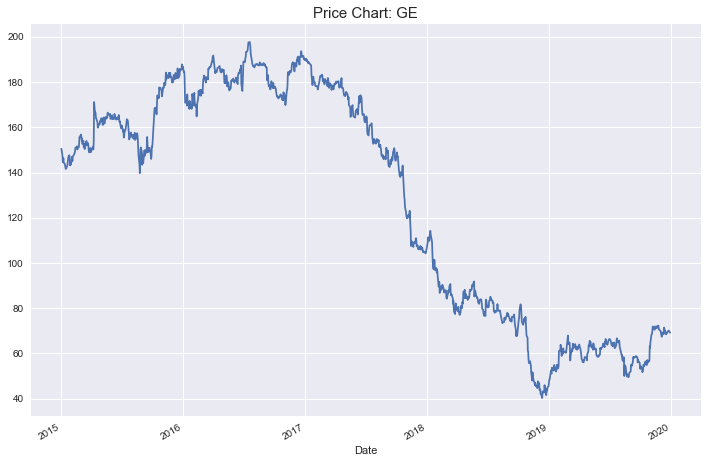

In [55]:
stock.plot_prices()

In [56]:
stock.annualized_perf()

Return: -0.156 | Risk: 0.298


### __Building the FinancialInstrument Class from scratch: Instantiation__

In [57]:
class FinancialInstrument():
    pass #(아무것도 입력하지 않음)

In [58]:
stock = FinancialInstrument()

In [60]:
# FinancialInstrument의 인스턴스임을 확인
stock

In [61]:
class FinancialInstrument():
    # 객체가 생성되면 맨 처음 객체를 초기회함
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end

In [63]:
stock = FinancialInstrument("GE", "2015-01-01", "2019-12-31")
stock

In [64]:
stock.ticker

'GE'

In [65]:
stock.start

'2015-01-01'

In [66]:
stock.end

'2019-12-31'

### __The method get_data()__

yfinance 라이브러리를 활용하여 주식 데이터를 다운받음
- ```yf.download("AAPL", "2015-01-01", "2019-12-31").Close.to_frame()```

yf.download("AAPL", "2015-01-01", "2019-12-31")을 실행하면 개장가, 고가, 저가, 폐장가, 조정된 폐장가, 거래량 데이터를 받게 됨

보통 Close(일일 폐장가)에만 관심이 있는 경우가 많음
- Close열을 선택하여 기본값으로 pandas 수열을 얻음
- to_frame() 메소드를 사용하여 pandas 수열을 데이터프레임으로 변환함

In [67]:
yf.download("AAPL", "2015-01-01", "2019-12-31").Close.to_frame()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2015-01-02 00:00:00-05:00,27.332500
2015-01-05 00:00:00-05:00,26.562500
2015-01-06 00:00:00-05:00,26.565001
2015-01-07 00:00:00-05:00,26.937500
2015-01-08 00:00:00-05:00,27.972500
...,...
2019-12-23 00:00:00-05:00,71.000000
2019-12-24 00:00:00-05:00,71.067497
2019-12-26 00:00:00-05:00,72.477501


In [68]:
# 변수에 AAPL의 원시데이터를 저장
raw = yf.download("AAPL", "2015-01-01", "2019-12-31").Close.to_frame()


[*********************100%***********************]  1 of 1 completed


In [71]:
# 열 레이블을 Close에서 price로 변경
# inplace 설정을 True로 설정하여 덮어쓰도록 함
raw.rename(columns= {"Close":"price"}, inplace=True)
raw

,price
Date,
2015-01-02 00:00:00-05:00,27.332500
2015-01-05 00:00:00-05:00,26.562500
2015-01-06 00:00:00-05:00,26.565001
2015-01-07 00:00:00-05:00,26.937500
2015-01-08 00:00:00-05:00,27.972500
...,...
2019-12-23 00:00:00-05:00,71.000000
2019-12-24 00:00:00-05:00,71.067497
2019-12-26 00:00:00-05:00,72.477501


get_data() 매소드로 클래스에 추가하려는 기능

In [88]:
class FinancialInstrument():
    # 객체가 생성되면 맨 처음 객체를 초기회함
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
    
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns= {"Close":"price"}, inplace=True)
        self.data = raw


In [89]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")
stock.ticker

[*********************100%***********************]  1 of 1 completed


'AAPL'

In [90]:
stock.get_data()

[*********************100%***********************]  1 of 1 completed


In [87]:
# 일일 종가 기준의 데이터 출력
stock.data

,price
Date,
2015-01-02 00:00:00-05:00,27.332500
2015-01-05 00:00:00-05:00,26.562500
2015-01-06 00:00:00-05:00,26.565001
2015-01-07 00:00:00-05:00,26.937500
2015-01-08 00:00:00-05:00,27.972500
...,...
2019-12-23 00:00:00-05:00,71.000000
2019-12-24 00:00:00-05:00,71.067497
2019-12-26 00:00:00-05:00,72.477501


### __The method log_returns()__

self.data에 새로운 열을 추가 [일일 수익률을 나타내는 로그 수익률]  
log_returns() 메소드를 도입


In [97]:
class FinancialInstrument():
    # 객체가 생성되면 맨 처음 객체를 초기회함
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns= {"Close":"price"}, inplace=True)
        self.data = raw

    # log_returns 열을 self.data에 추가하는 역할
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

In [98]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")
stock.data

[*********************100%***********************]  1 of 1 completed


,price,log_returns
Date,,
2015-01-02 00:00:00-05:00,27.332500,NaN
2015-01-05 00:00:00-05:00,26.562500,-0.028576
2015-01-06 00:00:00-05:00,26.565001,0.000094
2015-01-07 00:00:00-05:00,26.937500,0.013925
2015-01-08 00:00:00-05:00,27.972500,0.037703
...,...,...
2019-12-23 00:00:00-05:00,71.000000,0.016187
2019-12-24 00:00:00-05:00,71.067497,0.000950
2019-12-26 00:00:00-05:00,72.477501,0.019646


### __(String) Representation__

\__repr__
- repr은 representation의 약어
- 이 특수메소드를 사용하여 어떤 클래스의 인스턴스가 표현되고 표시되고 프린트되는 방식을 결정할 수 있음


In [99]:
# 위에서 데이터를 저장한 변수 stock을 표시하면 기술적인 표현을 얻게 됨
stock

In [101]:
# print() 함수를 사용해서 출력해도 비슷한 수준의 기술적 표현을 얻게 됨
# 좀 더 사용자가 알아보기 쉬운 표현을 얻기 위해서 __repr__를 사용
print(stock)

In [118]:
class FinancialInstrument():
    # 객체가 생성되면 맨 처음 객체를 초기회함
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()

    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, self.start, self.end)
    
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns= {"Close":"price"}, inplace=True)
        self.data = raw

    # log_returns 열을 self.data에 추가하는 역할
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

In [103]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [105]:
# __repr__ 메소드에서 호출한 표현을 출력해줌
stock

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [106]:
print(stock)

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)


요약
사용자 지정 문자열 표현을 만드는 건 불필요
클래스의 기능을 변경하거나 개선하지 않음
사용자는 객체 안에 무엇이 있는지 한 눈에 볼 수 있기 때문에 사용자 경험이 향상됨

### __The methods plot_data() and plot_returns()
그래프에는 숫자가 많이 사용되고 금융 데이터는 특히 많이 사용됨
그래서, 가격 차트를 만들고 금융 수익을 시각화 하는게 유익함

In [107]:
stock

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [109]:
# data 속성을 통해 원시 데이터인 가격과 수익률에 액세스할 수 있음
# 가격과 로그 수익률이 있는 데이터프레임을 얻을 수 있음
stock.data

,price,log_returns
Date,,
2015-01-02 00:00:00-05:00,27.332500,NaN
2015-01-05 00:00:00-05:00,26.562500,-0.028576
2015-01-06 00:00:00-05:00,26.565001,0.000094
2015-01-07 00:00:00-05:00,26.937500,0.013925
2015-01-08 00:00:00-05:00,27.972500,0.037703
...,...,...
2019-12-23 00:00:00-05:00,71.000000,0.016187
2019-12-24 00:00:00-05:00,71.067497,0.000950
2019-12-26 00:00:00-05:00,72.477501,0.019646


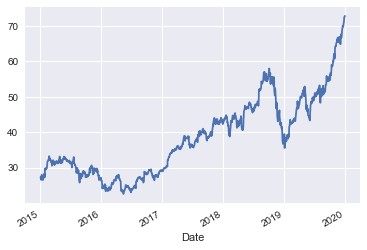

In [110]:
# price 열을 선택하고 plot()을 사용해서 가격 선 차트를 생성
stock.data.price.plot()
plt.show()

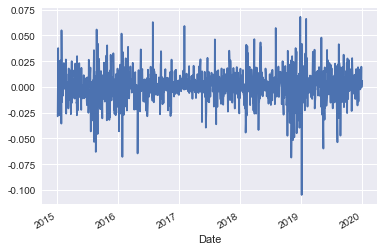

In [112]:
# log_returns를 사용해서 선차트를 생성할 수도 있음
# 시계열 수익률을 표시, 수익률 0을 중심으로 진동하고 있음 ->  변동성 클러스터를 볼 수 있음 
stock.data.log_returns.plot()
plt.show()

<AxesSubplot:>

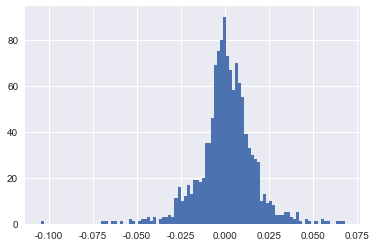

In [117]:
# 수익률을 빈도푼포(히스토그램)으로 플롯 
# 수익률 분포가 정규 분포인지 아닌지를 나타내는 첫 번째 지표
# 가설 검정을 수행해서 정규성을 판별할 수 있음
stock.data.log_returns.hist(bins=100)

In [127]:
class FinancialInstrument():
    # 객체가 생성되면 맨 처음 객체를 초기회함
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()

    # 객체의 정보를 사용자가 알아보기 쉽게 표현해줌
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, self.start, self.end)
    
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns= {"Close":"price"}, inplace=True)
        self.data = raw

    # log_returns 열을 self.data에 추가하는 역할
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

    # price 열의 데이터를 시각화해줌
    def plot_prices(self):
        self.data.price.plot(figsize = (12,8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize=15)
    
    # log_returns 열의 데이터를 시각화해줌
    def plot_returns(self, kind = 'ts'):
        if kind == 'ts':
            self.data.log_returns.plot(figsize= (12,8))
            plt.title("Returns: {}".format(self.ticker), fontsize= 15)
        elif kind == 'hist':
            self.data.log_returns.hist(figsize=(12,8), bins= int(np.sqrt(len(self.data)))) 
            # 빈의 개수는 관찰 개수의 제곱근과 대략 같아야 함
            # 빈은 정수여야 하기 때문에 정수로 변
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize=15)

In [128]:
stock.data

,price,log_returns
Date,,
2015-01-02 00:00:00-05:00,27.332500,NaN
2015-01-05 00:00:00-05:00,26.562500,-0.028576
2015-01-06 00:00:00-05:00,26.565001,0.000094
2015-01-07 00:00:00-05:00,26.937500,0.013925
2015-01-08 00:00:00-05:00,27.972500,0.037703
...,...,...
2019-12-23 00:00:00-05:00,71.000000,0.016187
2019-12-24 00:00:00-05:00,71.067497,0.000950
2019-12-26 00:00:00-05:00,72.477501,0.019646


In [129]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


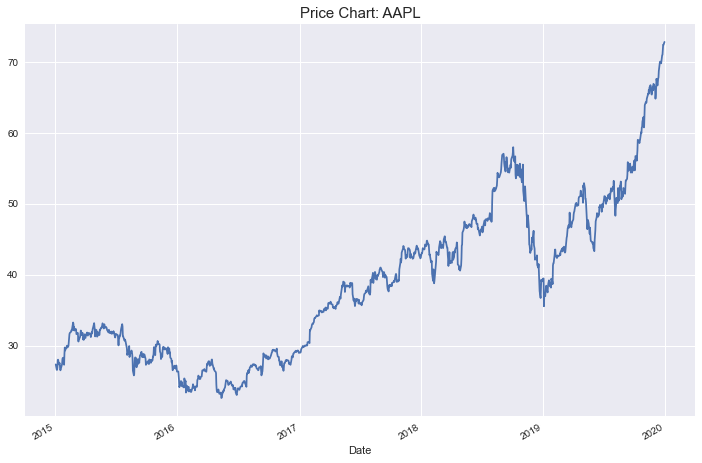

In [130]:
stock.plot_prices()

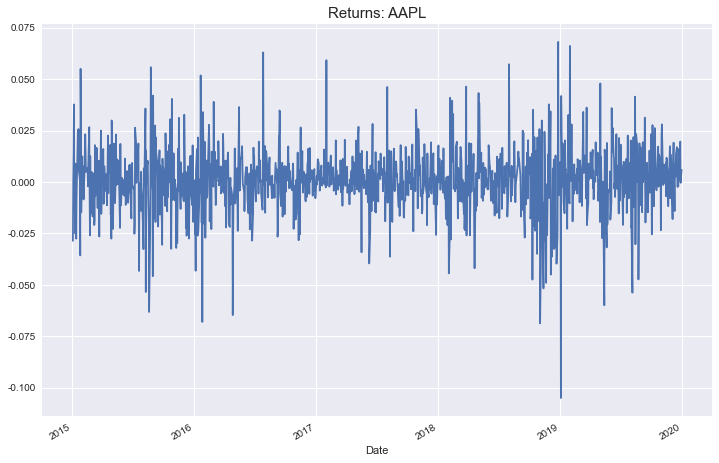

In [133]:
# kind의 기본 인자는 시계열(ts)
stock.plot_returns()

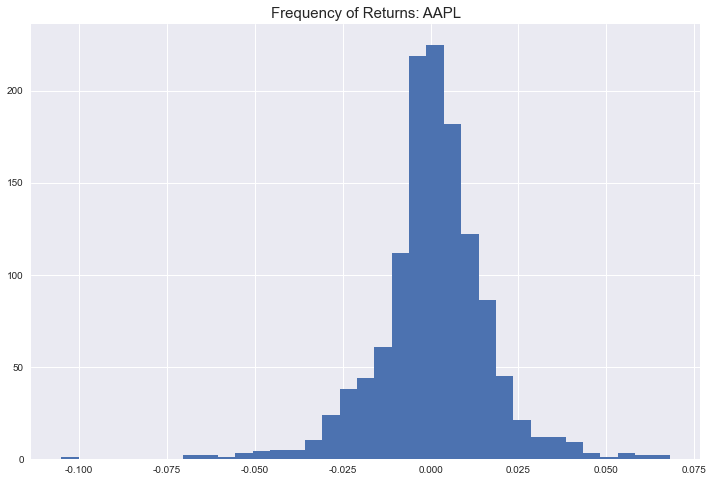

In [135]:
stock.plot_returns(kind="hist")

### __Encapsulation__
캡슐화는 OOP에서 실질적이고 어려운 문제를 풀어줌

In [136]:
stock

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

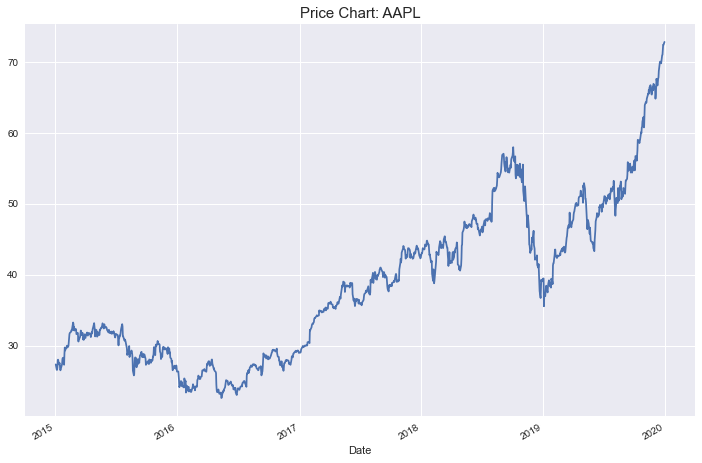

In [137]:
stock.plot_prices()

In [138]:
stock.ticker

'AAPL'

In [141]:
# stock의 데이터에 접근하여 속성 변경 가능
stock.ticker = "GE"
stock.ticker

'GE'

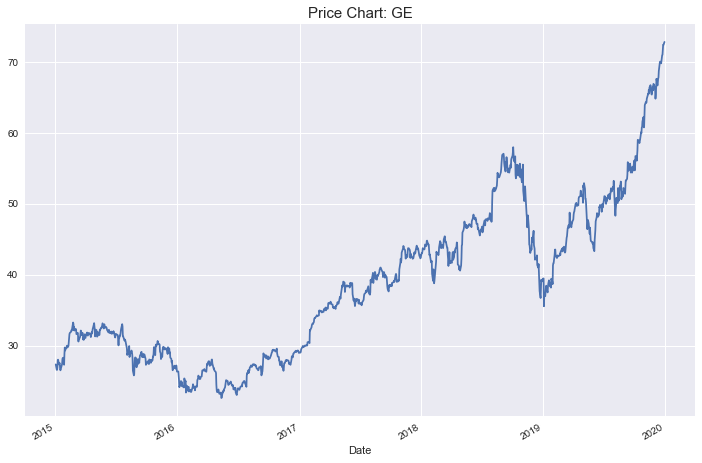

In [142]:
# ticker 속성을 변경했지만, 가격과 로그 수익률이 있는 데이터프레임은 변경되지는 않음
stock.plot_prices()

In [ ]:
보호된 속성을 생성하여 속성을 감추고 보호할 수 있음
속성 이름 앞에 밑줄 하나를 삽입하면 됨

In [143]:
class FinancialInstrument():
    # 객체가 생성되면 맨 처음 객체를 초기회함
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()

    # 객체의 정보를 사용자가 알아보기 쉽게 표현해줌
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
    
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns= {"Close":"price"}, inplace=True)
        self.data = raw

    # log_returns 열을 self.data에 추가하는 역할
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

    # price 열의 데이터를 시각화해줌
    def plot_prices(self):
        self.data.price.plot(figsize = (12,8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize=15)
    
    # log_returns 열의 데이터를 시각화해줌
    def plot_returns(self, kind = 'ts'):
        if kind == 'ts':
            self.data.log_returns.plot(figsize= (12,8))
            plt.title("Returns: {}".format(self._ticker), fontsize= 15)
        elif kind == 'hist':
            self.data.log_returns.hist(figsize=(12,8), bins= int(np.sqrt(len(self.data)))) 
            # 빈의 개수는 관찰 개수의 제곱근과 대략 같아야 함
            # 빈은 정수여야 하기 때문에 정수로 변
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize=15)

In [144]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [145]:
stock

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [149]:
# stock.을 해도 ticker 속성이 자동 검색되지 않고 _ticker를 명시적으로 입력해야 함
stock._ticker

'GE'

In [148]:
# ticker 속성을 변경
stock._ticker = "GE"
stock

FinancialInstrument(ticker = GE, start = 2015-01-01, end = 2019-12-31)

### __The method set_ticker()__

보호된 속성 _ticker를 변경하기 위한 메소드 제작

In [150]:
class FinancialInstrument():
    # 객체가 생성되면 맨 처음 객체를 초기회함
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()

    # 객체의 정보를 사용자가 알아보기 쉽게 표현해줌
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
    
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns= {"Close":"price"}, inplace=True)
        self.data = raw

    # log_returns 열을 self.data에 추가하는 역할
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

    # price 열의 데이터를 시각화해줌
    def plot_prices(self):
        self.data.price.plot(figsize = (12,8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize=15)
    
    # log_returns 열의 데이터를 시각화해줌
    def plot_returns(self, kind = 'ts'):
        if kind == 'ts':
            self.data.log_returns.plot(figsize= (12,8))
            plt.title("Returns: {}".format(self._ticker), fontsize= 15)
        elif kind == 'hist':
            self.data.log_returns.hist(figsize=(12,8), bins= int(np.sqrt(len(self.data)))) 
            # 빈의 개수는 관찰 개수의 제곱근과 대략 같아야 함
            # 빈은 정수여야 하기 때문에 정수로 변
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize=15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker 
            self.get_data()
            self.log_returns()


In [152]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")
stock

[*********************100%***********************]  1 of 1 completed


FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [153]:
stock.set_ticker("GE")

[*********************100%***********************]  1 of 1 completed


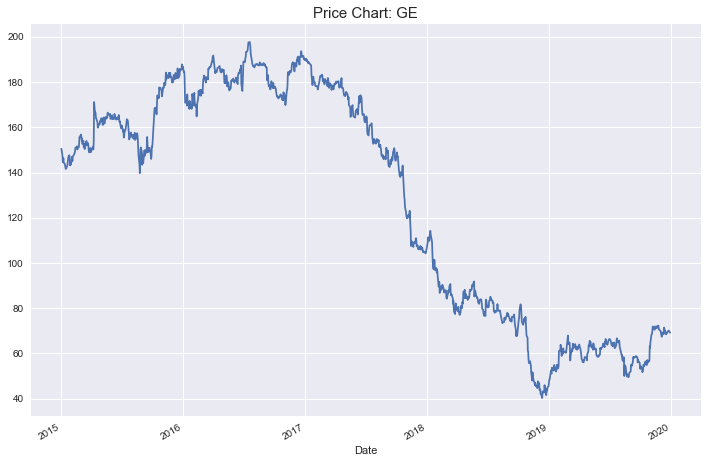

In [154]:
stock.plot_prices()

### __Adding more methods and performance metrics__

In [169]:
class FinancialInstrument():
    # 객체가 생성되면 맨 처음 객체를 초기회함
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()

    # 객체의 정보를 사용자가 알아보기 쉽게 표현해줌
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
    
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns= {"Close":"price"}, inplace=True)
        self.data = raw

    # log_returns 열을 self.data에 추가하는 역할
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

    # price 열의 데이터를 시각화해줌
    def plot_prices(self):
        self.data.price.plot(figsize = (12,8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize=15)
    
    # log_returns 열의 데이터를 시각화해줌
    def plot_returns(self, kind = 'ts'):
        if kind == 'ts':
            self.data.log_returns.plot(figsize= (12,8))
            plt.title("Returns: {}".format(self._ticker), fontsize= 15)
        elif kind == 'hist':
            self.data.log_returns.hist(figsize=(12,8), bins= int(np.sqrt(len(self.data)))) 
            # 빈의 개수는 관찰 개수의 제곱근과 대략 같아야 함
            # 빈은 정수여야 하기 때문에 정수로 변
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize=15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker 
            self.get_data()
            self.log_returns()
    
    def mean_return(self, freq=None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()

    # 수익률의 표준편차를 구함
    # 금융상품의 위험도를 나타내는 지료   
    def std_returns(self, freq=None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resmapled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resmapled_returns.std()

    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))



In [170]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [171]:
stock.mean_return()

0.0007808421402793629

In [172]:
stock.mean_return("M")

0.015450305477429897

In [173]:
stock.std_returns()

0.01569292603658385

In [174]:
stock.std_returns("M")

0.07624174164379922

In [175]:
stock.annualized_perf()

Return: 0.197 | Risk: 0.249


### __Inheritace__


In [176]:
class FinancialInstrumentBase(): # Parent
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()

    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
    
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns= {"Close":"price"}, inplace=True)
        self.data = raw

    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

    def plot_prices(self):
        self.data.price.plot(figsize = (12,8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize=15)
    
    def plot_returns(self, kind = 'ts'):
        if kind == 'ts':
            self.data.log_returns.plot(figsize= (12,8))
            plt.title("Returns: {}".format(self._ticker), fontsize= 15)
        elif kind == 'hist':
            self.data.log_returns.hist(figsize=(12,8), bins= int(np.sqrt(len(self.data)))) 
            # 빈의 개수는 관찰 개수의 제곱근과 대략 같아야 함
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize=15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker 
            self.get_data()
            self.log_returns()

In [186]:
class RiskReturn(FinancialInstrumentBase): # Child
    def __repr__(self):
        return "RiskReturn(ticker = {}, start= {}, end={})".format(self._ticker, self.start, self.end)

    def mean_return(self, freq=None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()

    # 수익률의 표준편차를 구함
    # 금융상품의 위험도를 나타내는 지료   
    def std_returns(self, freq=None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resmapled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resmapled_returns.std()

    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [187]:
stock = RiskReturn("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [188]:
stock.annualized_perf()

Return: 0.197 | Risk: 0.249


In [189]:
stock.data

,price,log_returns
Date,,
2015-01-02 00:00:00-05:00,27.332500,NaN
2015-01-05 00:00:00-05:00,26.562500,-0.028576
2015-01-06 00:00:00-05:00,26.565001,0.000094
2015-01-07 00:00:00-05:00,26.937500,0.013925
2015-01-08 00:00:00-05:00,27.972500,0.037703
...,...,...
2019-12-23 00:00:00-05:00,71.000000,0.016187
2019-12-24 00:00:00-05:00,71.067497,0.000950
2019-12-26 00:00:00-05:00,72.477501,0.019646


<AxesSubplot:xlabel='Date'>

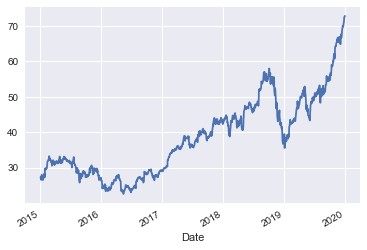

In [190]:
stock.data.price.plot()

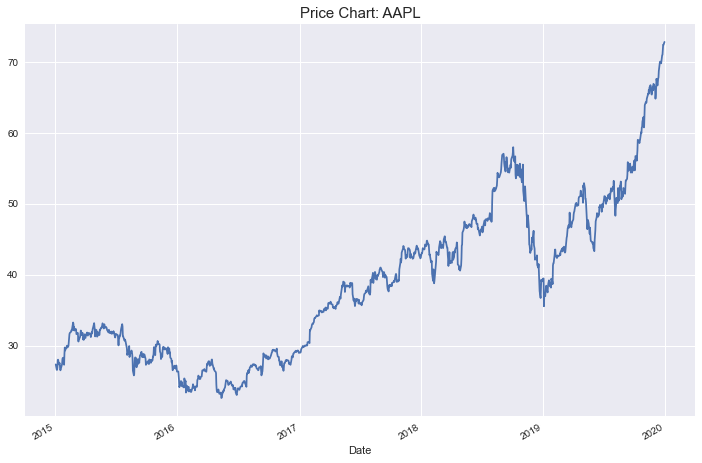

In [184]:
stock.plot_prices()

In [191]:
stock

RiskReturn(ticker = AAPL, start= 2015-01-01, end=2019-12-31)

### __Inheritance and the super() Function__

In [ ]:
class FinancialInstrumentBase(): # Parent
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()

    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
    
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns= {"Close":"price"}, inplace=True)
        self.data = raw

    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

    def plot_prices(self):
        self.data.price.plot(figsize = (12,8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize=15)
    
    def plot_returns(self, kind = 'ts'):
        if kind == 'ts':
            self.data.log_returns.plot(figsize= (12,8))
            plt.title("Returns: {}".format(self._ticker), fontsize= 15)
        elif kind == 'hist':
            self.data.log_returns.hist(figsize=(12,8), bins= int(np.sqrt(len(self.data)))) 
            # 빈의 개수는 관찰 개수의 제곱근과 대략 같아야 함
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize=15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker 
            self.get_data()
            self.log_returns()

In [192]:
class RiskReturn(FinancialInstrumentBase): # Child
    def __init__(self, ticker, start, end, freq=None):
        self.freq = freq
        super().__init__(ticker, start, end)

    def __repr__(self):
        return "RiskReturn(ticker = {}, start= {}, end={})".format(self._ticker, self.start, self.end)

    def mean_return(self, freq=None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()

    # 수익률의 표준편차를 구함
    # 금융상품의 위험도를 나타내는 지료   
    def std_returns(self, freq=None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resmapled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resmapled_returns.std()

    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [193]:
stock = RiskReturn("AAPL", "2015-01-01", "2019-12-31", freq="W")

[*********************100%***********************]  1 of 1 completed


In [194]:
stock.freq

'W'

In [195]:
stock._ticker

'AAPL'

### __Docstrings__
사용자에게 클래스와 메소드의 목적과 기능을 가르쳐주는 매뉴얼과 같음